In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import sklearn
import sklearn.datasets

import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

### Setup

In [2]:
# Read in the data and set up the input and output
diagnosis_df = pd.read_csv('data/diagnosis.csv')

X = diagnosis_df.drop(['ID number', 'Diagnosis'], axis=1)
y = diagnosis_df['Diagnosis'].map({'M': 1, 'B': 0})

In [3]:
# Split test, train, and demo
from sklearn.model_selection import train_test_split

X_use, X_demo, y_use, y_demo = train_test_split(X, y, random_state=1, test_size=0.02)
X_train, X_test, y_train, y_test = train_test_split(X_use, y_use, random_state=1)

In [4]:
print(len(X_train))
print(len(X_test))
print(len(X_demo))

417
139
12


In [5]:
# Scale X
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### SVM

In [6]:
# Create model
from sklearn.svm import SVC
model = SVC(kernel='linear')

In [17]:
# Initialize GridSearch
from sklearn.model_selection import GridSearchCV

# Set up C and gamma values
c_range = np.logspace(-3, 3, 7)
gamma_range = np.logspace(-10, -3, 7)
param_grid = {'C': c_range, 'gamma': gamma_range}
grid = GridSearchCV(model, param_grid, verbose=3)

In [18]:
# Fit model
grid.fit(X_train, y_train)

Fitting 3 folds for each of 49 candidates, totalling 147 fits
[CV] C=0.001, gamma=1e-10 ............................................
[CV] ... C=0.001, gamma=1e-10, score=0.9496402877697842, total=   0.0s
[CV] C=0.001, gamma=1e-10 ............................................
[CV] .... C=0.001, gamma=1e-10, score=0.935251798561151, total=   0.0s
[CV] C=0.001, gamma=1e-10 ............................................
[CV] ... C=0.001, gamma=1e-10, score=0.9424460431654677, total=   0.0s
[CV] C=0.001, gamma=1.4677992676220676e-09 ...........................
[CV]  C=0.001, gamma=1.4677992676220676e-09, score=0.9496402877697842, total=   0.0s
[CV] C=0.001, gamma=1.4677992676220676e-09 ...........................
[CV]  C=0.001, gamma=1.4677992676220676e-09, score=0.935251798561151, total=   0.0s
[CV] C=0.001, gamma=1.4677992676220676e-09 ...........................
[CV]  C=0.001, gamma=1.4677992676220676e-09, score=0.9424460431654677, total=   0.0s
[CV] C=0.001, gamma=2.1544346900318866e-08 ..

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.01, gamma=6.812920690579622e-05, score=0.9424460431654677, total=   0.0s
[CV] C=0.01, gamma=6.812920690579622e-05 .............................
[CV]  C=0.01, gamma=6.812920690579622e-05, score=0.9424460431654677, total=   0.0s
[CV] C=0.01, gamma=0.001 .............................................
[CV] .... C=0.01, gamma=0.001, score=0.9568345323741008, total=   0.0s
[CV] C=0.01, gamma=0.001 .............................................
[CV] .... C=0.01, gamma=0.001, score=0.9424460431654677, total=   0.0s
[CV] C=0.01, gamma=0.001 .............................................
[CV] .... C=0.01, gamma=0.001, score=0.9424460431654677, total=   0.0s
[CV] C=0.1, gamma=1e-10 ..............................................
[CV] ..... C=0.1, gamma=1e-10, score=0.9640287769784173, total=   0.0s
[CV] C=0.1, gamma=1e-10 ..............................................
[CV] ..... C=0.1, gamma=1e-10, score=0.9424460431654677, total=   0.0s
[CV] C=0.1, gamma=1e-10 .............................

[CV]  C=10.0, gamma=2.1544346900318866e-08, score=0.935251798561151, total=   1.6s
[CV] C=10.0, gamma=3.162277660168379e-07 .............................
[CV]  C=10.0, gamma=3.162277660168379e-07, score=0.9784172661870504, total=   2.3s
[CV] C=10.0, gamma=3.162277660168379e-07 .............................
[CV]  C=10.0, gamma=3.162277660168379e-07, score=0.9496402877697842, total=   2.4s
[CV] C=10.0, gamma=3.162277660168379e-07 .............................
[CV]  C=10.0, gamma=3.162277660168379e-07, score=0.935251798561151, total=   1.7s
[CV] C=10.0, gamma=4.641588833612782e-06 .............................
[CV]  C=10.0, gamma=4.641588833612782e-06, score=0.9784172661870504, total=   2.4s
[CV] C=10.0, gamma=4.641588833612782e-06 .............................
[CV]  C=10.0, gamma=4.641588833612782e-06, score=0.9496402877697842, total=   2.3s
[CV] C=10.0, gamma=4.641588833612782e-06 .............................
[CV]  C=10.0, gamma=4.641588833612782e-06, score=0.935251798561151, total=   

[Parallel(n_jobs=1)]: Done 147 out of 147 | elapsed:  3.2min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'gamma': array([1.00000e-10, 1.46780e-09, 2.15443e-08, 3.16228e-07, 4.64159e-06,
       6.81292e-05, 1.00000e-03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [19]:
grid.best_score_

0.9544364508393285

In [20]:
predictions = grid.predict(X_test)

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["malignant", "benign"]))

             precision    recall  f1-score   support

  malignant       0.99      0.93      0.96        87
     benign       0.89      0.98      0.94        52

avg / total       0.95      0.95      0.95       139



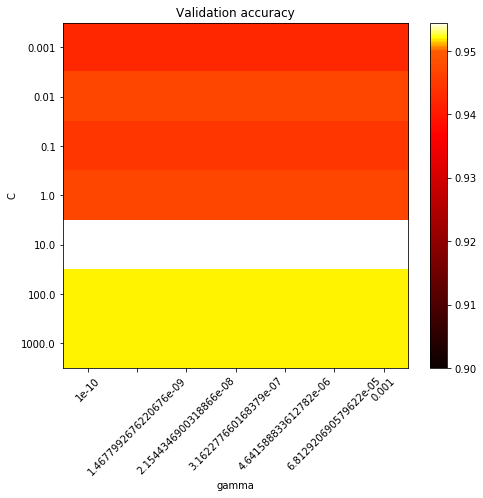

In [28]:
# Show heatmap
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

scores = grid.cv_results_['mean_test_score'].reshape(len(c_range),
                                                     len(gamma_range))

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.9, midpoint=0.95))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(c_range)), c_range)
plt.title('Validation accuracy')
plt.show()

### TensorFlow

In [ ]:
from keras.utils import to_categorical

In [ ]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)